##**Manufacturing company problem**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [8]:
cmp=pd.read_csv('Company_Data.csv')
cmp.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [9]:
cmp.shape

(400, 11)

In [10]:
cmp.insert(11,'sales_cat','')
cmp

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US sales_cat  
0           17   Yes  Yes            
1           10   Yes  Yes            
2           12   Yes  Yes            
3           14   Yes  Yes            
4           13   Yes   No            
..         ...   ...  ...       ...  
395         14   Yes  Yes            
396         11    No  Yes            
397         18   Yes  Yes            
398         12   Yes  Yes            
399         16   Yes  Yes            

[400 rows x 12 columns]

In [17]:
for i in range (0,len(cmp['Sales'])):
  if cmp['Sales'][i]>=0 and cmp['Sales'][i]<=6:
    cmp['sales_cat'][i]='bad'
  else:
    cmp['sales_cat'][i]='good'

<ipython-input-17-4a7cc734a1a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmp['sales_cat'][i]='good'
<ipython-input-17-4a7cc734a1a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmp['sales_cat'][i]='bad'


In [18]:
cmp.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US sales_cat  
0         17   Yes  Yes      good  
1         10   Yes  Yes      good  
2         12   Yes  Yes      good  
3         14   Yes  Yes      good  
4         13   Yes   No       bad

In [19]:
label_encoder=preprocessing.LabelEncoder()
cmp['ShelveLoc']=label_encoder.fit_transform(cmp['ShelveLoc'])
cmp['Urban']=label_encoder.fit_transform(cmp['Urban'])
cmp['US']=label_encoder.fit_transform(cmp['US'])
cmp.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban  US sales_cat  
0         17      1   1      good  
1         10      1   1      good  
2         12      1   1      good  
3         14      1   1      good  
4         13      1   0       bad

In [20]:
cmp['sales_cat']=label_encoder.fit_transform(cmp['sales_cat'])
cmp.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban  US  sales_cat  
0         17      1   1          1  
1         10      1   1          1  
2         12      1   1          1  
3         14      1   1          1  
4         13      1   0          0

In [21]:
cmp['sales_cat'].value_counts()

1    270
0    130
Name: sales_cat, dtype: int64

EDA

In [22]:
cmp.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int64
Age              int64
Education        int64
Urban            int64
US               int64
sales_cat        int64
dtype: object

In [23]:
cmp.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price   ShelveLoc         Age   Education       Urban          US  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean   115.795000    1.307500   53.322500   13.900000    0.705000    0.645000   
std     23.676664    0.833475   16.200297    2.620528    0.456614    0.479113   
min     24.000000    0.000000   25.000000   10.000000    0.000000    0.000000   
25%    100.000000    1.000000   39.750000   12.000000    0.000000    0.000000   
50%    117.000000    2.000000   54.500000   14.000000    1.000000    1.000000   
75%    131.000000    2.000000   66.000000   16.000000    1.000000    1.000000   
max    191.000000    2.000000   80.000000   18.000000    1.000000    1.000000   

        sales_cat  
count  400.000000  
mean     0.675000  
std      0.468961  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000

In [24]:
cmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
 11  sales_cat    400 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


In [25]:
cmp.duplicated().sum()

0

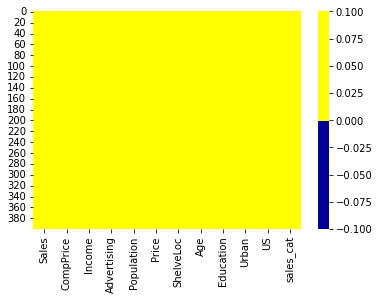

In [26]:
import seaborn as sns
cols=cmp.columns
colours=['#000099','#ffff00']
sns.heatmap(cmp[cols].isnull(),cmap=sns.color_palette(colours))

In [27]:
cmp.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales_cat      0
dtype: int64

outliers

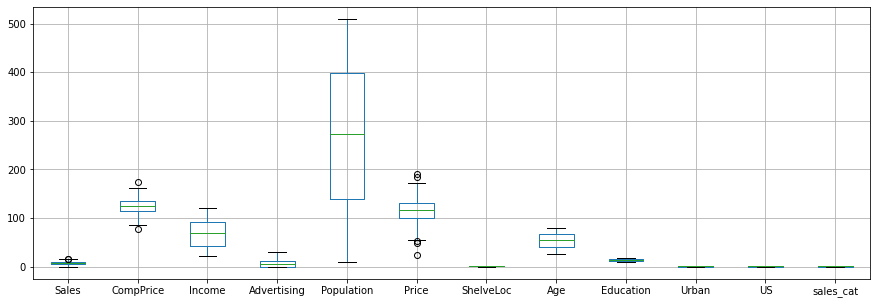

In [28]:
box=cmp.boxplot(figsize=(15,5))

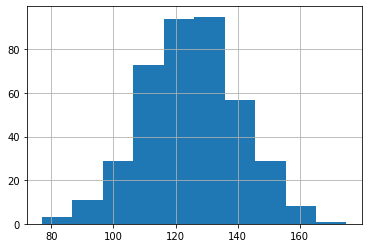

In [29]:
cmp['CompPrice'].hist()

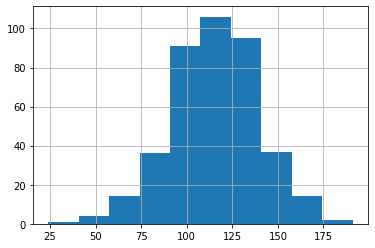

In [30]:
cmp['Price'].hist()

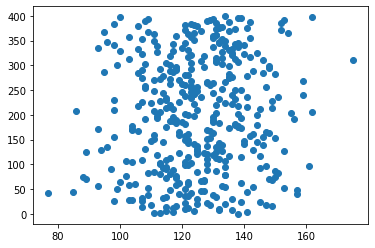

In [31]:
plt.scatter(cmp['CompPrice'],cmp.index)

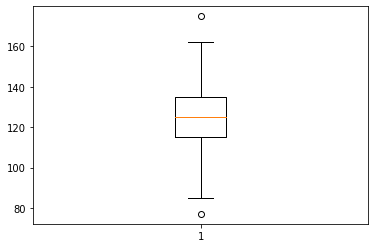

In [32]:
com=plt.boxplot(cmp.CompPrice)

In [33]:
type(com)
for i,j in com.items():
  print(i,j)

whiskers [<matplotlib.lines.Line2D object at 0x7fcd1f659430>, <matplotlib.lines.Line2D object at 0x7fcd1f659790>]
caps [<matplotlib.lines.Line2D object at 0x7fcd1f659af0>, <matplotlib.lines.Line2D object at 0x7fcd1f659e50>]
boxes [<matplotlib.lines.Line2D object at 0x7fcd1f6590d0>]
medians [<matplotlib.lines.Line2D object at 0x7fcd1f6651f0>]
fliers [<matplotlib.lines.Line2D object at 0x7fcd1f6654f0>]
means []


In [34]:
[item.get_ydata() for item in com['fliers']]

[array([ 77, 175])]

In [35]:
cmp.iloc[[42,310],:]

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
42   10.43         77      69            0          25     24          2   50   
310   9.53        175      65           29         419    166          2   53   

     Education  Urban  US  sales_cat  
42          18      1   0          1  
310         12      1   1          1

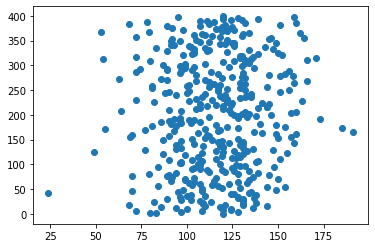

In [36]:
plt.scatter(cmp['Price'],cmp.index)

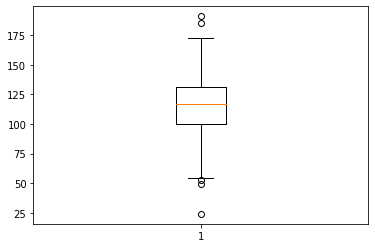

In [37]:
pri=plt.boxplot(cmp['Price'])

In [38]:
type(pri)
for i,j in pri.items():
  print(i,j)

whiskers [<matplotlib.lines.Line2D object at 0x7fcd1f50ef70>, <matplotlib.lines.Line2D object at 0x7fcd1f51b310>]
caps [<matplotlib.lines.Line2D object at 0x7fcd1f51b670>, <matplotlib.lines.Line2D object at 0x7fcd1f51b9d0>]
boxes [<matplotlib.lines.Line2D object at 0x7fcd1f50ec10>]
medians [<matplotlib.lines.Line2D object at 0x7fcd1f51bd30>]
fliers [<matplotlib.lines.Line2D object at 0x7fcd1f526070>]
means []


In [39]:
[item.get_ydata() for item in pri['fliers']]

[array([ 24,  49,  53, 191, 185])]

In [40]:
cmp.iloc[[42,125,165,174,367],:]

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
42   10.43         77      69            0          25     24          2   50   
125   9.34         89      78            0         181     49          2   43   
165   0.37        147      58            7         100    191          0   27   
174   0.00        139      24            0         358    185          2   79   
367  14.37         95     106            0         256     53          1   52   

     Education  Urban  US  sales_cat  
42          18      1   0          1  
125         15      0   0          1  
165         15      1   1          0  
174         15      0   0          0  
367         17      1   0          1

In [41]:
cmp=cmp.drop(cmp.index[[42,125,165,174,310,367]],axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcd1f4768b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcd1f476f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcd1f476550>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcd1f480670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcd1f480970>],
 'means': []}

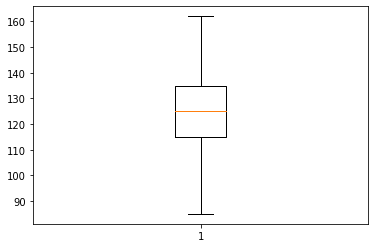

In [42]:
plt.boxplot(cmp['CompPrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcd1f450c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcd1f45d310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcd1f4508b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcd1f45d9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcd1f45dcd0>],
 'means': []}

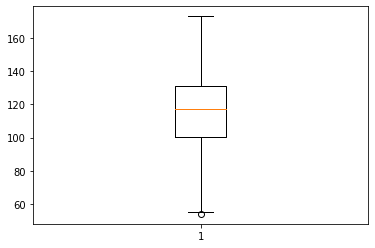

In [43]:
plt.boxplot(cmp['Price'])

In [44]:
cmp=cmp.drop('Sales',axis=1)

In [45]:
cmp.head()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138      73           11         276    120          0   42   
1        111      48           16         260     83          1   65   
2        113      35           10         269     80          2   59   
3        117     100            4         466     97          2   55   
4        141      64            3         340    128          0   38   

   Education  Urban  US  sales_cat  
0         17      1   1          1  
1         10      1   1          1  
2         12      1   1          1  
3         14      1   1          1  
4         13      1   0          0

In [46]:
cmp.shape

(394, 11)

In [47]:
x=cmp.iloc[:,:-1]
y=cmp['sales_cat']

In [49]:
cmp['sales_cat'].unique()

array([1, 0])

In [50]:
cmp.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales_cat'],
      dtype='object')

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [52]:
len(x_train.columns)

10

building decision tree classifier using entropy criteria

In [53]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [54]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=5)

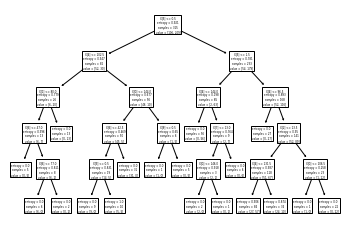

In [55]:
#plot the decision tree
from sklearn import tree
tree.plot_tree(model);

In [59]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']#.columns
cn=['low','medium','high']#.value_count.keys
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=2000)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [60]:
#predicting on test data
preds=model.predict(x_test)#predicting on test data set
pd.Series(preds).value_counts()#getting the count of each category

1    60
0    19
dtype: int64

In [61]:
y_test.value_counts()

1    57
0    22
Name: sales_cat, dtype: int64

In [62]:
preds

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [63]:
pd.crosstab(y_test,preds) #getting the 2 way table to understand the correct and wrong predictions

col_0       0   1
sales_cat        
0          13   9
1           6  51

In [64]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds)

0.810126582278481

In [65]:
np.mean(preds==y_test)

0.810126582278481

##**Fraud check problem**

In [66]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [67]:
frd=pd.read_csv('Fraud_check.csv')
frd.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [68]:
frd.shape

(600, 6)

In [69]:
frd.insert(6,'fraud_cat','')
frd.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban fraud_cat  
0   YES            
1   YES            
2   YES            
3   YES            
4    NO

In [70]:
for i in range (0,len(frd['Taxable.Income'])):
  if frd['Taxable.Income'][i]<=30000:
    frd['fraud_cat'][i]='Risky'
  else:
    frd['fraud_cat'][i]='Good'

<ipython-input-70-45cacc4cd3a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frd['fraud_cat'][i]='Good'
<ipython-input-70-45cacc4cd3a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frd['fraud_cat'][i]='Risky'


In [71]:
frd.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban fraud_cat  
0   YES      Good  
1   YES      Good  
2   YES      Good  
3   YES      Good  
4    NO      Good

In [72]:
label_encoder=preprocessing.LabelEncoder()
frd['Undergrad']=label_encoder.fit_transform(frd['Undergrad'])
frd['Marital.Status']=label_encoder.fit_transform(frd['Marital.Status'])
frd['Urban']=label_encoder.fit_transform(frd['Urban'])
frd.head()

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0          0               2           68833            50047   
1          1               0           33700           134075   
2          0               1           36925           160205   
3          1               2           50190           193264   
4          0               1           81002            27533   

   Work.Experience  Urban fraud_cat  
0               10      1      Good  
1               18      1      Good  
2               30      1      Good  
3               15      1      Good  
4               28      0      Good

In [73]:
frd['fraud_cat']=label_encoder.fit_transform(frd['fraud_cat'])
frd.head()

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0          0               2           68833            50047   
1          1               0           33700           134075   
2          0               1           36925           160205   
3          1               2           50190           193264   
4          0               1           81002            27533   

   Work.Experience  Urban  fraud_cat  
0               10      1          0  
1               18      1          0  
2               30      1          0  
3               15      1          0  
4               28      0          0

In [74]:
frd['fraud_cat'].value_counts()

0    476
1    124
Name: fraud_cat, dtype: int64

In [75]:
frd.shape

(600, 7)

In [76]:
x=frd.iloc[:,:-1]
y=frd['fraud_cat']

In [77]:
frd['fraud_cat'].unique()

array([0, 1])

In [78]:
frd.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'fraud_cat'],
      dtype='object')

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [80]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [81]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

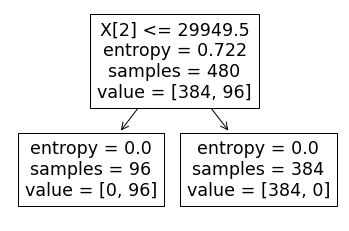

In [82]:
#plot the decision tree
from sklearn import tree
tree.plot_tree(model);

[Text(0.5, 0.75, 'Taxable.Income <= 29949.5\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]\nclass = Risky'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 96\nvalue = [0, 96]\nclass = Good'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 384\nvalue = [384, 0]\nclass = Risky')]

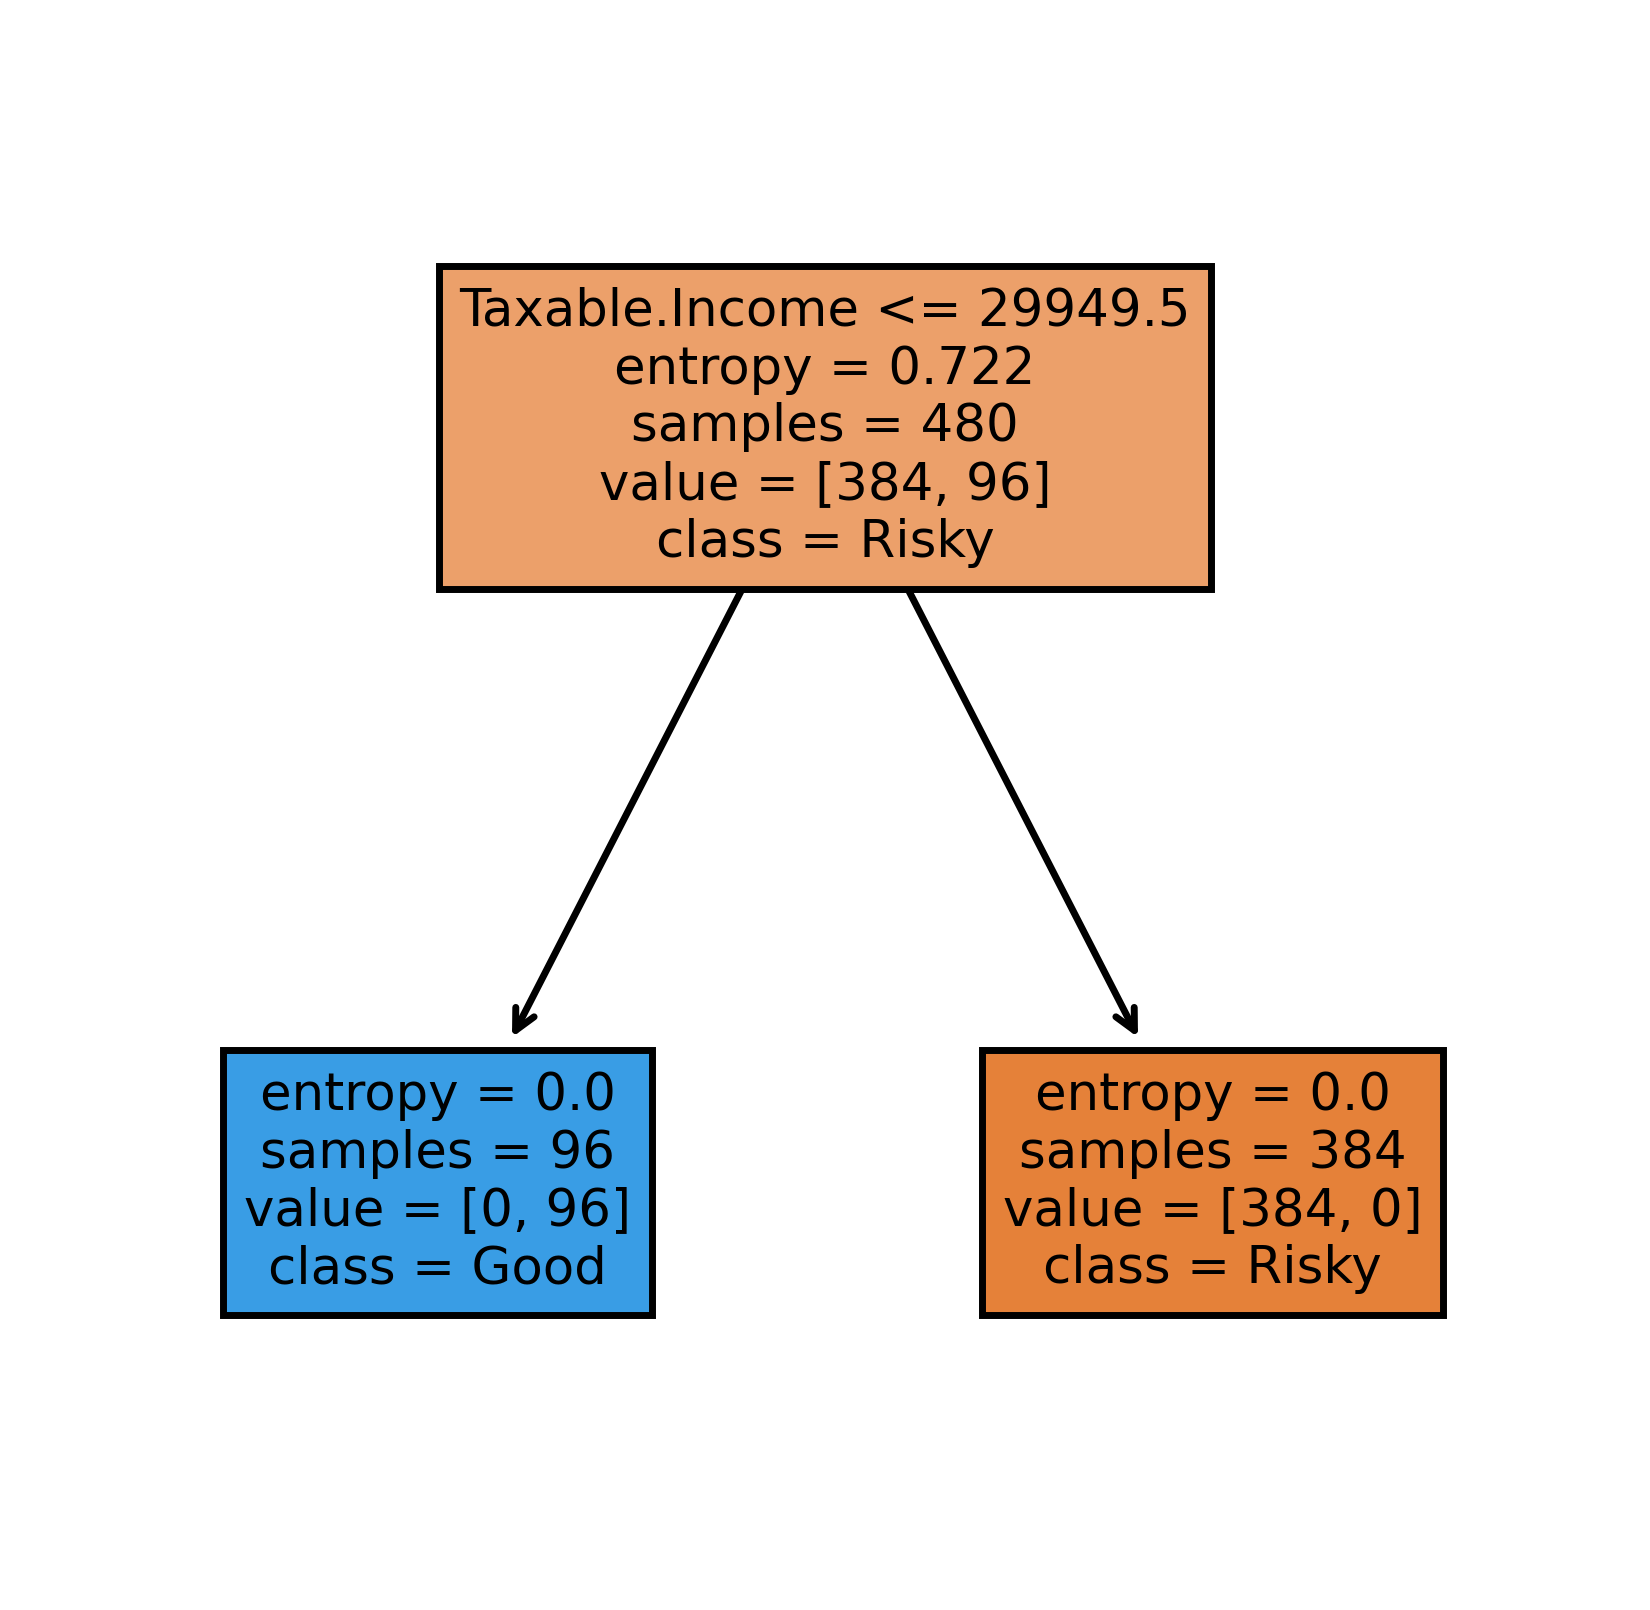

In [83]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']#.columns
cn=['Risky','Good']#.value_count.keys
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=500)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [84]:
#predicting on test data
preds=model.predict(x_test)#predicting on test data set
pd.Series(preds).value_counts()#getting the count of each category

0    92
1    28
dtype: int64

In [85]:
y_test.value_counts()

0    92
1    28
Name: fraud_cat, dtype: int64

In [86]:
preds

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [87]:
pd.crosstab(y_test,preds) #getting the 2 way table to understand the correct and wrong predictions

col_0       0   1
fraud_cat        
0          92   0
1           0  28

In [88]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds)

1.0

In [89]:
np.mean(preds==y_test)

1.0